<h1 align="center">Volume 1: Facial Recognition.</h1>

    Jane Slagle
    Math 321 Section 2
    11/17/21

In [1]:
import os
import numpy as np
from imageio import imread
from matplotlib import pyplot as plt
from scipy import linalg as la

### Helper Functions

In [2]:
def get_faces(path="./faces94"):
    """Traverse the specified directory to obtain one image per subdirectory. 
    Flatten and convert each image to grayscale.
    
    Parameters:
        path (str): The directory containing the dataset of images.  
    
    Returns:
        ((mn,k) ndarray) An array containing one column vector per
            subdirectory. k is the number of people, and each original
            image is mxn.
    """
    # Traverse the directory and get one image per subdirectory.
    faces = []
    for (dirpath, dirnames, filenames) in os.walk(path):
        for fname in filenames:
            if fname[-3:]=="jpg":       # Only get jpg images.
                # Load the image, convert it to grayscale,
                # and flatten it into a vector.
                faces.append(np.ravel(imread(dirpath+"/"+fname, as_gray=True)))
                break
    # Put all the face vectors column-wise into a matrix.
    return np.transpose(faces)


def sample_faces(k, path="./faces94"):
    """Generate k sample images from the given path.

    Parameters:
        n (int): The number of sample images to obtain. 
        path(str): The directory containing the dataset of images.  
    
    Yields:
        ((mn,) ndarray): An flattend mn-array representing a single
        image. k images are yielded in total.
    """
    files = []
    for (dirpath, dirnames, filenames) in os.walk(path):
        for fname in filenames:
            if fname[-3:]=="jpg":       # Only get jpg images.
                files.append(dirpath+"/"+fname)

    # Get a subset of the image names and yield the images one at a time.
    test_files = np.random.choice(files, k, replace=False)
    for fname in test_files:
        yield np.ravel(imread(fname, as_gray=True))

### Problem 1 

- Implement `show()`.
- Use `show()` to display a face from the `faces94` dataset.

In [3]:
def show(image, m=200, n=180):
    """Plot the flattened grayscale 'image' of width 'w' and height 'h'.
    
    Parameters:
        image ((mn,) ndarray): A flattened image.
        m (int): The original number of rows in the image.
        n (int): The original number of columns in the image.
    """
    #convert flattened image into its og mxn shape
    og_image = np.reshape(image, (m, n))
    
    #display the og_image
    plt.imshow(og_image, cmap = "gray")
    plt.show()

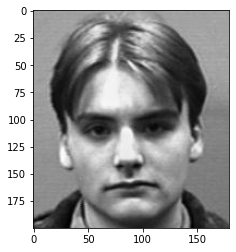

In [4]:
#use show() to display face from faces94 dataset. Use the helper function given to get the image
#a column is a person in the faces94 dataset. So use show() to plot one person
show(get_faces()[:,0])

In [5]:
class FacialRec(object):
    """Class for storing a database of face images, with methods for
    matching other faces to the database.
    
    Attributes:
        F ((mn,k) ndarray): The flatten images of the dataset, where
            k is the number of people, and each original image is mxn.
        mu ((mn,) ndarray): The mean of all flatten images.
        Fbar ((mn,k) ndarray): The images shifted by the mean.
        U ((mn,k) ndarray): The U in the compact SVD of Fbar;
            the columns are the eigenfaces.
    """
    # Problems 2-3
    def __init__(self, path='./faces94'):
        """Initialize the F, mu, Fbar, and U attributes.
        This is the main part of the computation.
        """
        #use problem 1 function to construct F
        self.F = get_faces()
        
        #compute the mean face
        #mu is 1/k * sum from 1 to k of f_i
        self.mean_u = np.mean(self.F, axis = 1)  #mean is average so this says: sum(self.F)/len(self.F)
                                                 #take the mean of all the columns: why have axis = 1
        #told in lab manual that F bar is matrix with mean shifted vector - mean for each entry in the matrix
        self.F_bar = self.F - self.mean_u.reshape(-1,1)  #do it with the entire matrices so that you do it for 
                                                         #each entry in the F_bar matrix
        
        #calculate compact SVD of F_bar, F_bar is saved as an attribute
        compact_SVD = la.svd(self.F_bar, full_matrices = False)
        #get matrix U from the compact SVD. Matrix U is returned first from la.svd function
        matrix_U = compact_SVD[0]
        #save U matrix as an attribute
        self.U = matrix_U
        
        
    # Problem 3
    def project(self, A, s):
        """Project a face vector onto the subspace spanned by the first s
        eigenfaces, and represent that projection in terms of those eigenfaces.
        
        Parameters:
            A((mn,) or (mn,l) ndarray): The array to be projected. 
            s(int): the number of eigenfaces.
        Returns: 
            ((s,) ndarray): An array of the projected image of s eigenfaces.
        """
        return self.U[:, :s].T @ A
        _
    # Problem 5
    def find_nearest(self, g, s=38):
        """Find the index j such that the jth column of F is the face that is
        closest to the face image 'g'.
        
        Parameters:
            g ((mn,) ndarray): A flattened face image.
            s (int): the number of eigenfaces to use in the projection.

        Returns:
            (int): the index of the column of F that is the best match to
                   the input face image 'g'.
        """
        #use method from problem 3 to compute F_hat, g_hat
        F_hat = self.project(self.F, s)
        g_hat = self.project(g, s)
        
        #then use equation 1.5 in lab manual
        
        index = np.argmin(la.norm(F_hat - g_hat.reshape(-1,1), axis = 0))  
        return index
        
    # Problem 6
    def match(self, image, s=38, m=200, n=180):
        """Display an image along with its closest match from the dataset. 
        
        Parameters:
            image ((mn,) ndarray): A flattened face image.
            s (int): The number of eigenfaces to use in the projection.
            m (int): The original number of rows in the image.
            n (int): The original number of columns in the image.
        """
        #use method from problem 5 to find index j of best matching face
        index = self.find_nearest(image, s)
        
        #use show function to display the best match
        show(image) 
        print(index)
        show(self.F[:,index])  #transpose it because just putting index there without .T gives you the row, 
                               #but putting .T[index] gives you the column so that able to plot it like all the
                               #other ones
                

### Problem 2

- In `FacialRec.__init__()`, compute $F$, the mean face $\boldsymbol{\mu}$, and the mean-shifted faces $\bar{F}$.
Store each as an attribute.

- Initialize a `FacialRec` object and display its mean face, plus an original image and its shifted face.

Mean face


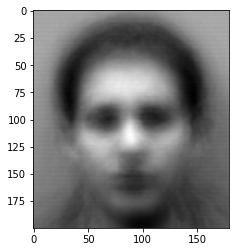

In [6]:
#use function from problem 1 to plot the mean face: so want to plot our mean object
#so first have to create an object in our class
#and then find the mean of our object and use problem 1 function to plot it
face_object = FacialRec()
print("Mean face")
show(face_object.mean_u)

Original face


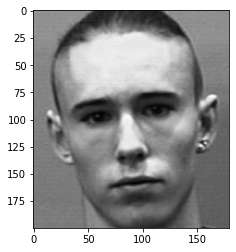

In [7]:
print("Original face")
show(face_object.F[:, 23])

Shifted face


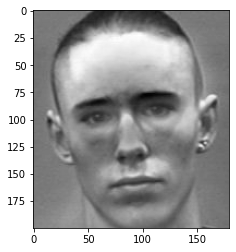

In [8]:
print("Shifted face")
show(face_object.F_bar[:, 23])

### Problem 3

- In `FacialRec.__init__()`, compute the compact SVD of $\bar{F}$ and store the $U$ as an attribute.
- Use `show()` to display some of the eigenfaces (the columns of $U$).
- Implement `FacialRec.project()` (in a single line).


1st eigenface


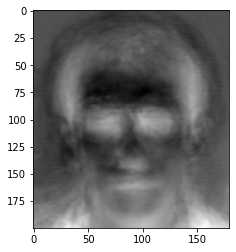

50th eigenface


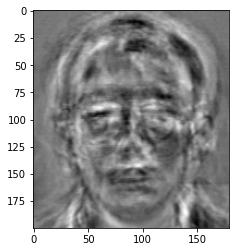

100th eigenface


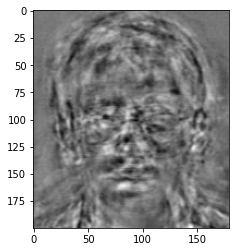

In [9]:

#want compare computed eigenfaces (which are the columns of U) to figure 1.2 in lab manual
#use show() function from problem 1 to display the eigenfaces (columns of U)
#have the FacialRec class object made above called face_object, so need to use face_object class object to 
#actually use function 1 to display the eigenfaces

print("1st eigenface")
show(face_object.U[:,0])      #get 1st column of U. Figure 1.2 has the 1st, 50th, 100th eigenface
print("50th eigenface")
show(face_object.U[:,49])     #get 50th column of U
print("100th eigenface")
show(face_object.U[:,99])     #get 100th column of U

### Problem 4

- Select one of the shifted images $\bar{\mathbf{f}}_i$.
- For at least 4 values of $s$, use `FacialRec.project()` to compute the corresponding $s$-projection $\widehat{\mathbf{f}}_i$, then compute the reconstruction $\widetilde{\mathbf{f}}_i$.
- Display each of the reconstructions and the original image.

s = 5


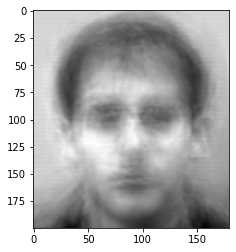

s = 19


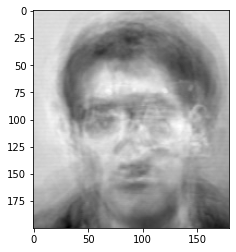

s = 75


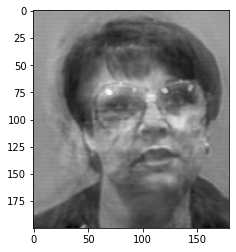

s = 97


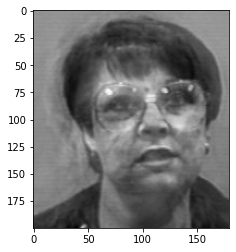

Original Image


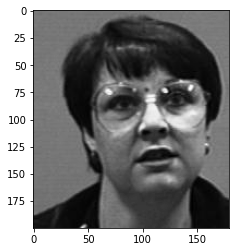

In [10]:
#select a randomimage from dataset of images
#use method from problem 3 on 4 s values
#loop through all the s values in a for loop and do equation 1.3 in lab manual and use show() function on it
#to display reconstruction

for s in [5, 19, 75, 97]:
    print("s =", s)
    show(face_object.U[:, :s]@face_object.project(face_object.F[:,129], s) + face_object.mean_u)

#also want to display the original image
print("Original Image")
show(face_object.F[:,129])

### Problem 5 
Implement `FacialRec.find_nearest()`.

### Problem 6

- Implement `FacialRec.match()`.
- Generate some random faces with `sample_faces()`, and use `FacialRec.match()` to find the closest match (let $s=38$).
- For each test, display the sample image and its closest match.

In [11]:
def sample_faces(num_faces, path="./faces94"):
    # Get the list of possible images.
    files = []
    for (dirpath, dirnames, filenames) in os.walk(path):
        for fname in filenames:
            if fname[-3:]=="jpg": # Only get jpg images.
                files.append(dirpath+"/"+fname)
    # Get a subset of the image names and yield the images one at a time.
    test_files = np.random.choice(files, num_faces, replace=False)
    for fname in test_files:
        yield np.ravel(imread(fname, as_gray=True))

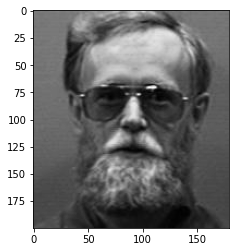

151


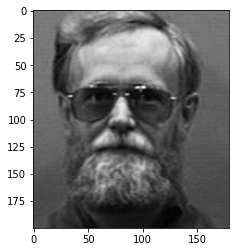

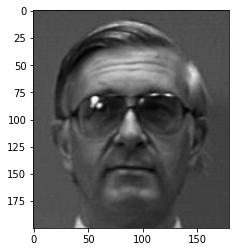

134


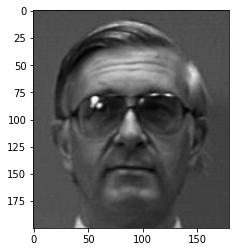

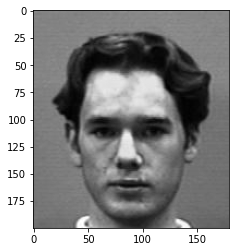

71


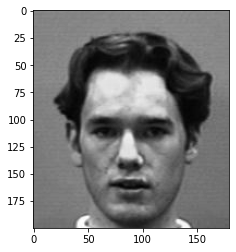

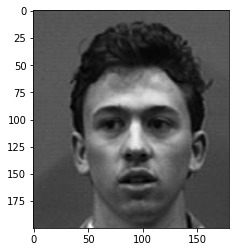

36


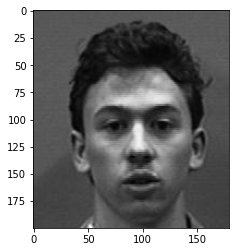

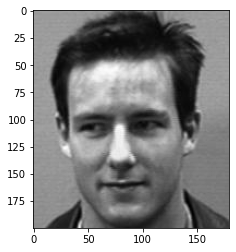

109


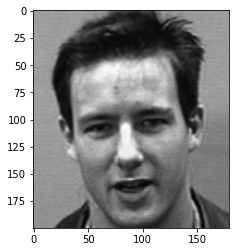

In [12]:
for test_image in sample_faces(5):
    face_object.match(test_image)